In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


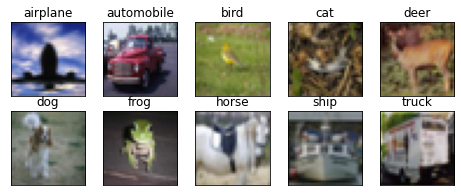

In [2]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [3]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

def build_model_v1():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(Dense(128))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v2():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(Dense(64))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v3():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [6]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 4s 81us/step - loss: 2.0403 - accuracy: 0.3132 - val_loss: 1.8139 - val_accuracy: 0.3618
Epoch 2/40
50000/50000 [==============================] - 4s 83us/step - loss: 1.8258 - accuracy: 0.3563 - val_loss: 1.8082 - val_accuracy: 0.3611
Epoch 3/40
50000/50000 [==============================] - 4s 86us/step - loss: 1.8062 - accuracy: 0.3651 - val_loss: 1.7772 - val_accuracy: 0.3812
Epoch 4/40
50000/50000 [==============================] - 4s 84us/step - loss: 1.7954 - accuracy: 0.3719 - val_loss: 1.7884 - val_accuracy: 0.3679
Epoch 5/40
50000/50000 [==============================] - 4s 77us/step - loss: 1.7814 - accuracy: 0.3753 - val_loss: 1.8144 - val_accuracy: 0.3511
Epoch 6/40
50000/50000 [==============================] - 4s 74us/step - loss: 1.7775 - accuracy: 0.3768 - val_loss: 1.7791 - val_accuracy: 0.3760
Epoch 7/40
50000/50000 [==============================] - 4s 75us/st

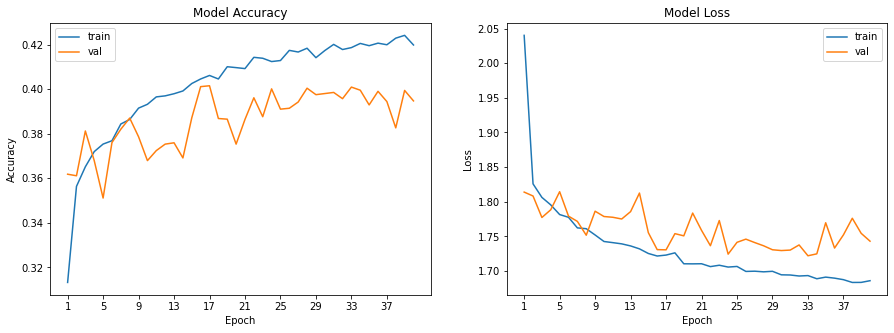

Training MLP took 139.11408066749573 seconds


In [7]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [8]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_2 (Activation)    (None, 10)               

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 3s 66us/step - loss: 2.1882 - accuracy: 0.2981 - val_loss: 1.8336 - val_accuracy: 0.3580
Epoch 2/40
50000/50000 [==============================] - 3s 61us/step - loss: 1.8281 - accuracy: 0.3594 - val_loss: 1.7969 - val_accuracy: 0.3495
Epoch 3/40
50000/50000 [==============================] - 3s 62us/step - loss: 1.7962 - accuracy: 0.3707 - val_loss: 1.7747 - val_accuracy: 0.3785
Epoch 4/40
50000/50000 [==============================] - 3s 61us/step - loss: 1.7914 - accuracy: 0.3721 - val_loss: 1.8022 - val_accuracy: 0.3646
Epoch 5/40
50000/50000 [==============================] - 3s 61us/step - loss: 1.7685 - accuracy: 0.3823 - val_loss: 1.8066 - val_accuracy: 0.3612
Epoch 6/40
50000/50000 [==============================] - 3s 62us/step - loss: 1.7685 - accuracy: 0.3853 - val_loss: 1.7893 - val_accuracy: 0.3781
Epoch 7/40
50000/50000 [==============================] - 4s 72us/st

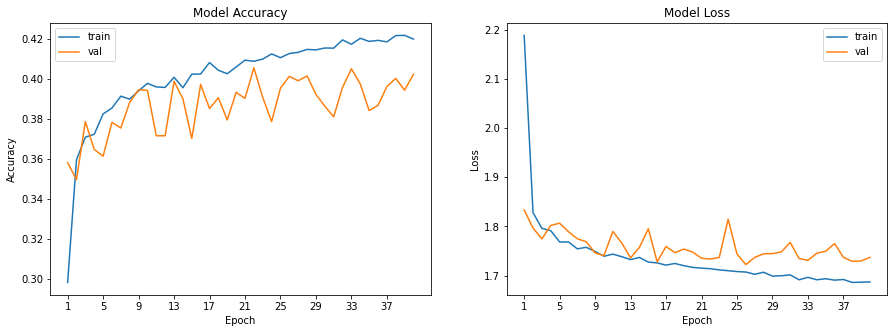

Training MLP took 141.91599941253662 seconds


In [9]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [10]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)               

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 20s 398us/step - loss: 1.9560 - accuracy: 0.2846 - val_loss: 1.7745 - val_accuracy: 0.3547
Epoch 2/40
50000/50000 [==============================] - 19s 387us/step - loss: 1.7103 - accuracy: 0.3846 - val_loss: 1.6392 - val_accuracy: 0.4098
Epoch 3/40
50000/50000 [==============================] - 20s 395us/step - loss: 1.6168 - accuracy: 0.4185 - val_loss: 1.5823 - val_accuracy: 0.4301
Epoch 4/40
50000/50000 [==============================] - 19s 389us/step - loss: 1.5468 - accuracy: 0.4455 - val_loss: 1.5327 - val_accuracy: 0.4560
Epoch 5/40
50000/50000 [==============================] - 20s 396us/step - loss: 1.4994 - accuracy: 0.4628 - val_loss: 1.4746 - val_accuracy: 0.4744
Epoch 6/40
50000/50000 [==============================] - 19s 385us/step - loss: 1.4587 - accuracy: 0.4792 - val_loss: 1.5649 - val_accuracy: 0.4518
Epoch 7/40
50000/50000 [==============================] 

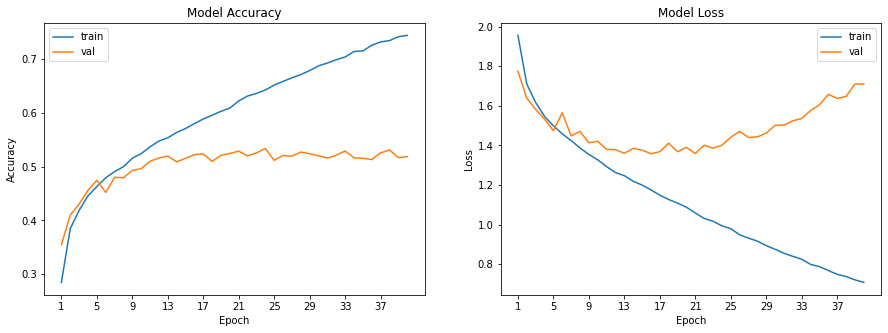

Training MLP took 791.1328933238983 seconds


In [11]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Definición de una red convolucional multicapa

In [12]:
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Input, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D

def create_block(block_input, n_filtros):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
    return x

def build_conv(include_dropout = True): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))

    block1 = create_block(net_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(block1)
    if include_dropout:
        x = Dropout(0.2)(x)

    block2 = create_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(block2)
    if include_dropout:
        x = Dropout(0.3)(x)

    block3 = create_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(block3)
    if include_dropout:
        x = Dropout(0.3)(block3)

    x = Flatten()(x)
    output = Dense(10, activation='softmax')(x)
    return Model(net_input, output)


In [13]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

import keras.backend as K

model = build_conv()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 223s 4ms/step - loss: 1.7762 - accuracy: 0.4403 - val_loss: 3.7116 - val_accuracy: 0.1002
Epoch 2/20
50000/50000 [==============================] - 222s 4ms/step - loss: 1.2260 - accuracy: 0.5922 - val_loss: 3.8440 - val_accuracy: 0.1302
Epoch 3/20
50000/50000 [==============================] - 228s 5ms/step - loss: 0.9921 - accuracy: 0.6622 - val_loss: 3.1727 - val_accuracy: 0.2385
Epoch 4/20
50000/50000 [==============================] - 227s 5ms/step - loss: 0.8659 - accuracy: 0.7010 - val_loss: 2.4006 - val_accuracy: 0.3106
Epoch 5/20
50000/50000 [==============================] - 227s 5ms/step - loss: 0.7628 - accuracy: 0.7375 - val_loss: 1.3420 - val_accuracy: 0.5520
Epoch 6/20
50000/50000 [==============================] - 229s 5ms/step - loss: 0.7001 - accuracy: 0.7574 - val_loss: 0.8618 - val_accuracy: 0.7116
Epoch 7/20
50000/50000 [==============================] - 256s

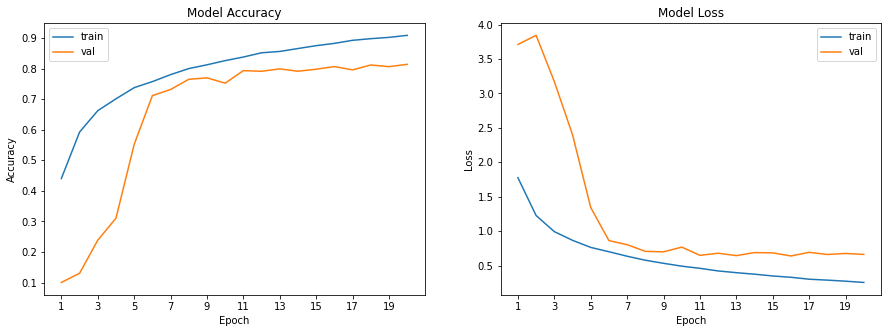

Training MLP took 4542.738701581955 seconds


In [14]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")